In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv('Flight_Booking.csv')

In [6]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...
104211,104211,AirAsia,I5-1780,Bangalore,Early_Morning,one,Morning,Kolkata,Economy,6.83,13.0,5176.0
104212,104212,AirAsia,I5-1562,Bangalore,Afternoon,one,Night,Kolkata,Economy,7.50,13.0,5176.0
104213,104213,AirAsia,I5-741,Bangalore,Morning,one,Evening,Kolkata,Economy,8.17,13.0,5176.0
104214,104214,AirAsia,I5-749,Bangalore,Night,one,Early_Morning,Kolkata,Economy,8.75,13.0,5176.0


In [7]:
col_list=list(df)

In [8]:
col_list

['Unnamed: 0',
 'airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left',
 'price']

In [9]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            1
days_left           1
price               1
dtype: int64

In [10]:
for col_name in col_list:
  if   df[col_name].dtype=='object':
       df[col_name]=df[col_name].fillna(df[col_name].mode()[0])
  else:
       df[col_name]=df[col_name].fillna(df[col_name].mean())


In [11]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [12]:
df=df.drop(columns='Unnamed: 0',axis=1)

In [13]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.170000,1.000000,5953.000000
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.330000,1.000000,5953.000000
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.170000,1.000000,5956.000000
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.250000,1.000000,5955.000000
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.330000,1.000000,5955.000000
...,...,...,...,...,...,...,...,...,...,...,...
104211,AirAsia,I5-1780,Bangalore,Early_Morning,one,Morning,Kolkata,Economy,6.830000,13.000000,5176.000000
104212,AirAsia,I5-1562,Bangalore,Afternoon,one,Night,Kolkata,Economy,7.500000,13.000000,5176.000000
104213,AirAsia,I5-741,Bangalore,Morning,one,Evening,Kolkata,Economy,8.170000,13.000000,5176.000000
104214,AirAsia,I5-749,Bangalore,Night,one,Early_Morning,Kolkata,Economy,8.750000,13.000000,5176.000000


In [ ]:

df.shape

(300153, 11)

In [14]:
df.describe()

,duration,days_left,price
count,104216.000000,104216.000000,104216.000000
mean,10.938732,25.725769,6384.752857
std,7.049225,13.693905,3678.453090
min,1.170000,1.000000,1890.000000
25%,5.750000,14.000000,4028.000000
50%,9.500000,26.000000,5547.000000
75%,14.750000,38.000000,7484.000000
max,41.580000,49.000000,40354.000000


Data Visualisation

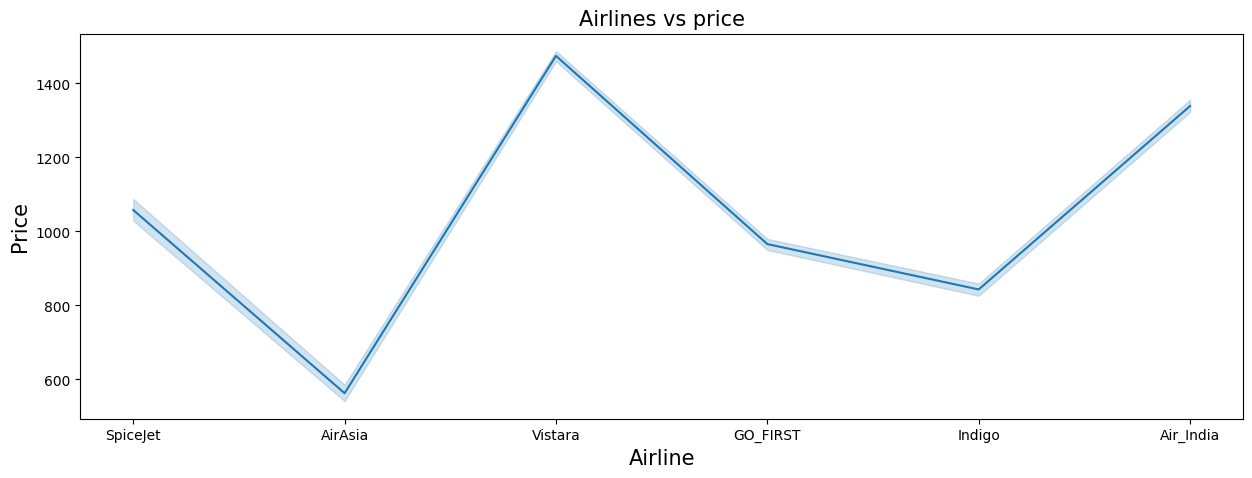

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airlines vs price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

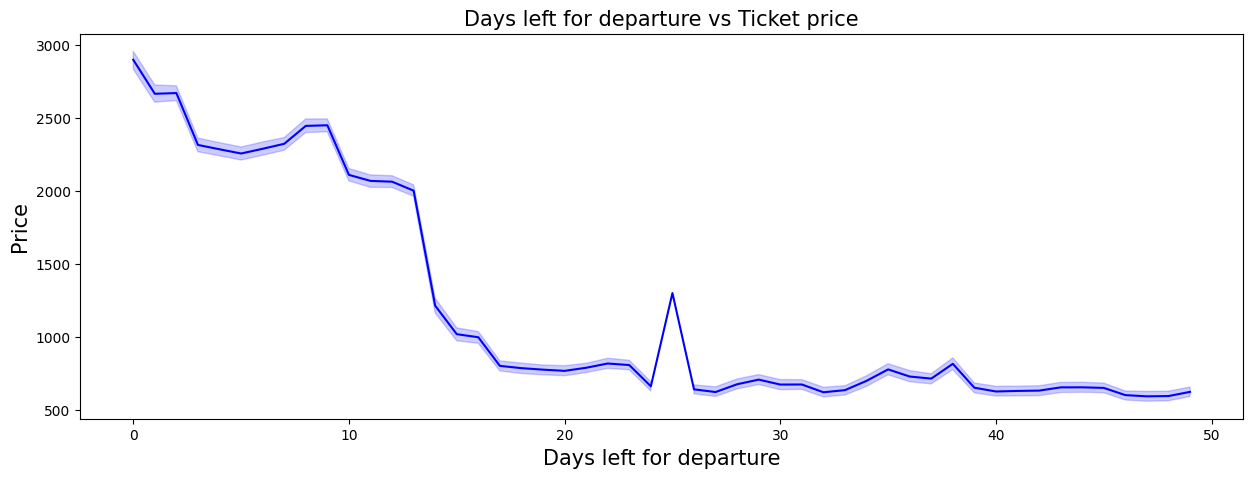

In [ ]:

plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='days_left',y='price',color='Blue')
plt.title('Days left for departure vs Ticket price',fontsize=15)
plt.xlabel('Days left for departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<Axes: xlabel='airline', ylabel='price'>

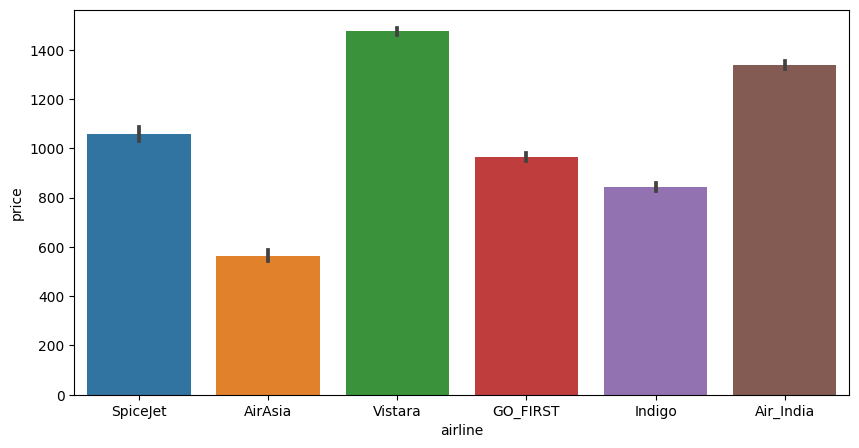

In [ ]:
plt.figure(figsize=(10,5));
sns.barplot(x='airline',y='price',data=df)

<Axes: xlabel='class', ylabel='price'>

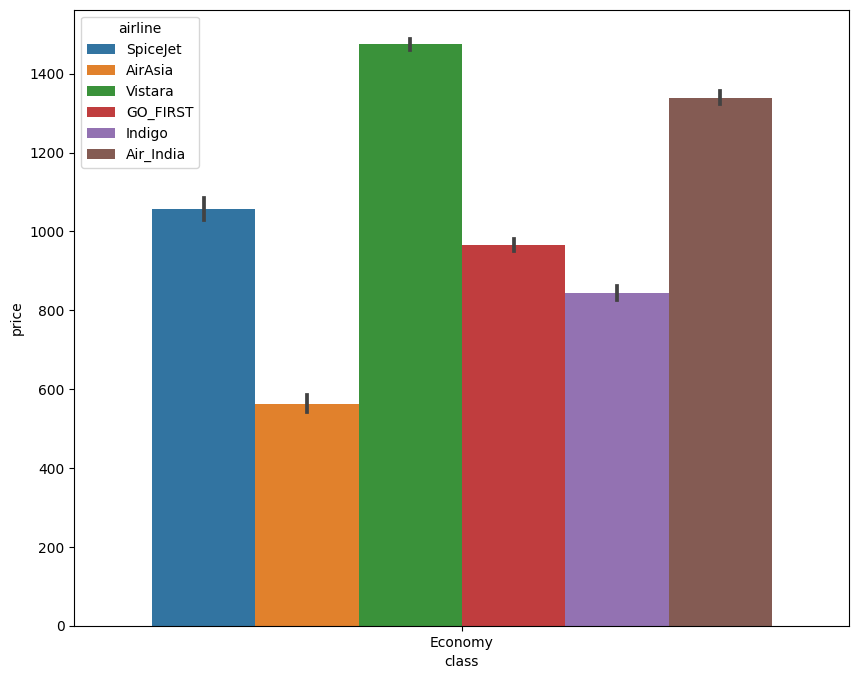

In [ ]:
plt.figure(figsize=(10,8));
sns.barplot(x='class',y='price',data=df,hue='airline')

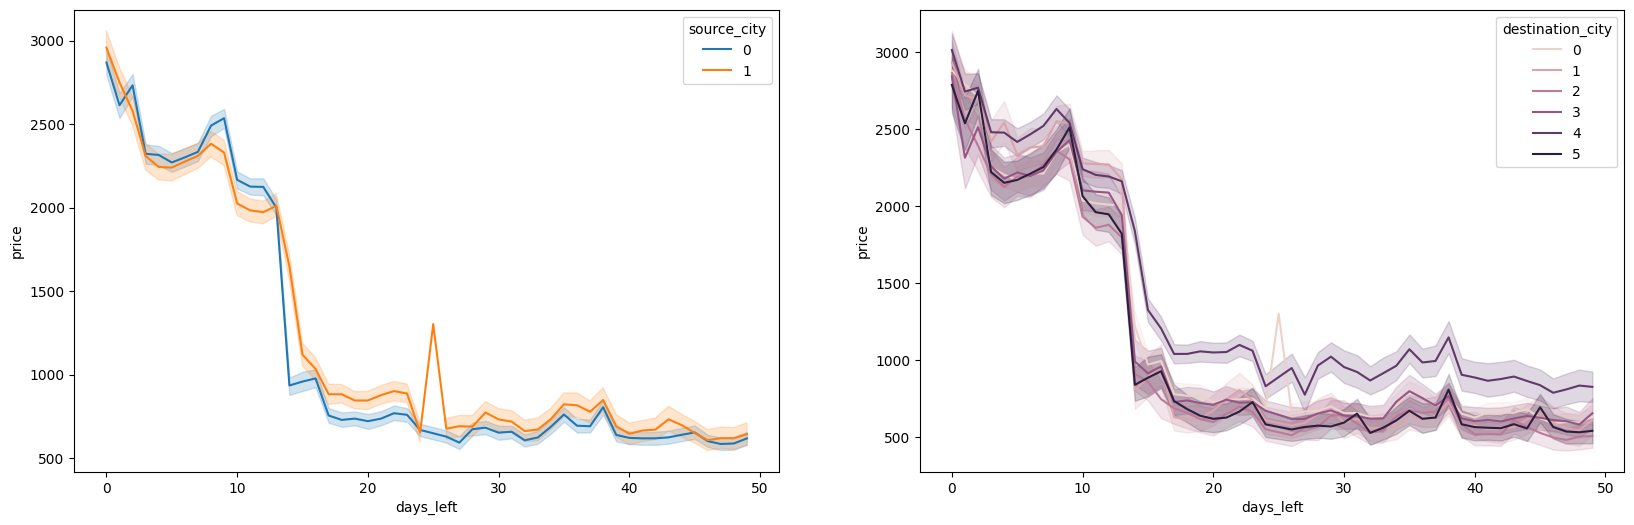

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])
plt.show()

data_info

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104216 entries, 0 to 104215
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           104216 non-null  object 
 1   flight            104216 non-null  object 
 2   source_city       104216 non-null  object 
 3   departure_time    104216 non-null  object 
 4   stops             104216 non-null  object 
 5   arrival_time      104216 non-null  object 
 6   destination_city  104216 non-null  object 
 7   class             104216 non-null  object 
 8   duration          104216 non-null  float64
 9   days_left         104216 non-null  float64
 10  price             104216 non-null  float64
dtypes: float64(3), object(8)
memory usage: 8.7+ MB


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()

In [26]:
df['days_left']=le.fit_transform(df['days_left'])

In [27]:
df['price']=le.fit_transform(df['price'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104216 entries, 0 to 104215
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           104216 non-null  int64  
 1   flight            104216 non-null  int64  
 2   source_city       104216 non-null  int64  
 3   departure_time    104216 non-null  int64  
 4   stops             104216 non-null  int64  
 5   arrival_time      104216 non-null  int64  
 6   destination_city  104216 non-null  int64  
 7   class             104216 non-null  int64  
 8   duration          104216 non-null  float64
 9   days_left         104216 non-null  int64  
 10  price             104216 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 8.7 MB


label incoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()

In [21]:
df['airline']=le.fit_transform(df['airline'])
df['source_city']=le.fit_transform(df['source_city'])
df['departure_time']=le.fit_transform(df['departure_time'])
df['stops']=le.fit_transform(df['stops'])
df['arrival_time']=le.fit_transform(df['arrival_time'])
df['destination_city']=le.fit_transform(df['destination_city'])
df['class']=le.fit_transform(df['class'])
df['flight']=le.fit_transform(df['flight'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104216 entries, 0 to 104215
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           104216 non-null  int64  
 1   flight            104216 non-null  int64  
 2   source_city       104216 non-null  int64  
 3   departure_time    104216 non-null  int64  
 4   stops             104216 non-null  int64  
 5   arrival_time      104216 non-null  int64  
 6   destination_city  104216 non-null  int64  
 7   class             104216 non-null  int64  
 8   duration          104216 non-null  float64
 9   days_left         104216 non-null  int64  
 10  price             104216 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 8.7 MB


In [23]:
df.shape

(104216, 11)

In [ ]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,660,0,3,2,5,5,0,2.170000,0,1076
1,4,640,0,2,2,4,5,0,2.330000,0,1076
2,0,568,0,2,2,1,5,0,2.170000,0,1079
3,5,765,0,5,2,0,5,0,2.250000,0,1078
4,5,755,0,5,2,4,5,0,2.330000,0,1078
...,...,...,...,...,...,...,...,...,...,...,...
65692,1,408,1,3,0,2,4,0,24.170000,24,479
65693,1,369,1,3,0,2,4,0,25.170000,24,479
65694,1,314,1,1,0,2,4,0,27.580000,24,479
65695,3,230,1,1,0,5,4,0,4.420000,24,562


In [ ]:
df=df.drop(columns='flight',axis=1)

Feature_Selection

<Axes: >

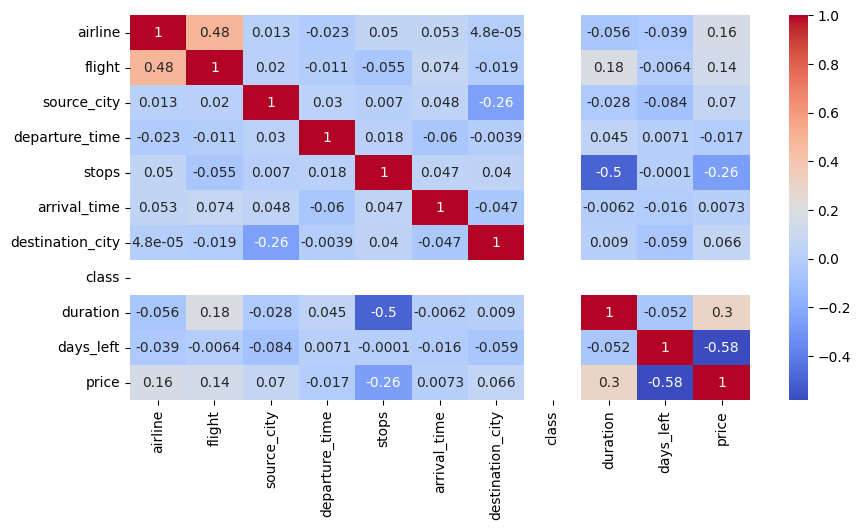

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Treating_Multiculinearty

In [ ]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!='object') & (col!='price')):
         col_list.append(col)

x=df[col_list]
vif_data= pd.DataFrame()
vif_data['feature']= x.columns
vif_data["vif"]=[variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
print(vif_data)

            feature       vif
0           airline  4.532434
1            flight  7.537235
2       source_city  1.558708
3    departure_time  3.928918
4             stops  1.594544
5      arrival_time  3.502875
6  destination_city  2.365815
7             class       NaN
8          duration  3.992099
9         days_left  3.362964


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(['flight'],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!='object') & (col!='price')):
         col_list.append(col)

x=df[col_list]
vif_data= pd.DataFrame()
vif_data['feature']= x.columns
vif_data["vif"]=[variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
print(vif_data)

            feature       vif
0           airline  3.062571
1       source_city  1.548571
2    departure_time  3.894587
3             stops  1.580342
4      arrival_time  3.423305
5  destination_city  2.354061
6             class       NaN
7          duration  3.528903
8         days_left  3.282090


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!='object') & (col!='price')):
         col_list.append(col)

x=df[col_list]
vif_data= pd.DataFrame()
vif_data['feature']= x.columns
vif_data["vif"]=[variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
print(vif_data)

            feature       vif
0           airline  3.062571
1       source_city  1.548571
2    departure_time  3.894587
3             stops  1.580342
4      arrival_time  3.423305
5  destination_city  2.354061
6             class       NaN
7          duration  3.528903
8         days_left  3.282090


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(['class'],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!='object') & (col!='price')):
         col_list.append(col)

x=df[col_list]
vif_data= pd.DataFrame()
vif_data['feature']= x.columns
vif_data["vif"]=[variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
print(vif_data)

            feature       vif
0           airline  3.062571
1       source_city  1.548571
2    departure_time  3.894587
3             stops  1.580342
4      arrival_time  3.423305
5  destination_city  2.354061
6          duration  3.528903
7         days_left  3.282090


Model_Selection

In [ ]:
x=df.iloc[:,:-1]
y=df['price']

In [ ]:
x

,airline,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left
0,4,0,3,2,5,5,2.170000,0
1,4,0,2,2,4,5,2.330000,0
2,0,0,2,2,1,5,2.170000,0
3,5,0,5,2,0,5,2.250000,0
4,5,0,5,2,4,5,2.330000,0
...,...,...,...,...,...,...,...,...
65692,1,1,3,0,2,4,24.170000,24
65693,1,1,3,0,2,4,25.170000,24
65694,1,1,1,0,2,4,27.580000,24
65695,3,1,1,0,5,4,4.420000,24


In [ ]:
y

0        1076
1        1076
2        1079
3        1078
4        1078
         ... 
65692     479
65693     479
65694     479
65695     562
65696    1302
Name: price, Length: 65697, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left
8857,1,0,2,0,2,5,12.17,44
63798,3,1,3,2,2,4,2.33,14
5373,5,0,3,2,2,5,2.33,28
21111,0,0,5,1,5,4,11.50,6
45194,1,1,6,0,2,2,19.75,12
...,...,...,...,...,...,...,...,...
37194,5,0,5,0,2,1,8.25,14
6265,1,0,3,0,0,5,20.83,32
54886,2,1,1,1,3,0,10.58,13
860,5,0,3,0,4,5,12.42,5


In [ ]:
x_test

,airline,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left
16045,3,0,5,0,2,0,9.92,31
7182,1,0,3,0,5,5,6.25,36
33090,1,0,3,0,5,3,26.58,34
14402,4,0,3,0,4,0,13.50,22
31972,5,0,3,0,4,3,17.00,26
...,...,...,...,...,...,...,...,...
16295,2,0,2,0,0,0,7.17,32
4982,3,0,5,0,2,5,7.67,26
28218,2,0,1,0,1,4,15.75,46
30071,5,0,3,0,5,3,27.75,11


In [ ]:
y_train

8857      238
63798    1839
5373       93
21111    3226
45194    3369
         ... 
37194     653
6265      121
54886     708
860      2864
15795      97
Name: price, Length: 52557, dtype: int64

In [ ]:
y_test

16045     284
7182      884
33090     351
14402     928
31972     984
         ... 
16295     288
4982      269
28218    1291
30071    3195
36675    1877
Name: price, Length: 13140, dtype: int64

standard_scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
x_train=sc.fit_transform(x_train)

In [ ]:
x_test=sc.fit_transform(x_test)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
y_pred

array([ 870.59753176,  542.43098936, 1142.68226271, ...,  493.00088358,
       2453.81226435, 1632.2426417 ])

In [ ]:
difference= pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual_value','Predicted_value'])

In [ ]:
difference

,Actual_value,Predicted_value
0,284.0,870.597532
1,884.0,542.430989
2,351.0,1142.682263
3,928.0,1442.296827
4,984.0,1547.376613
...,...,...
13135,288.0,698.783036
13136,269.0,1141.384037
13137,1291.0,493.000884
13138,3195.0,2453.812264


<ipython-input-59-322d9056a76f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
<ipython-input-59-322d9056a76f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predicted')


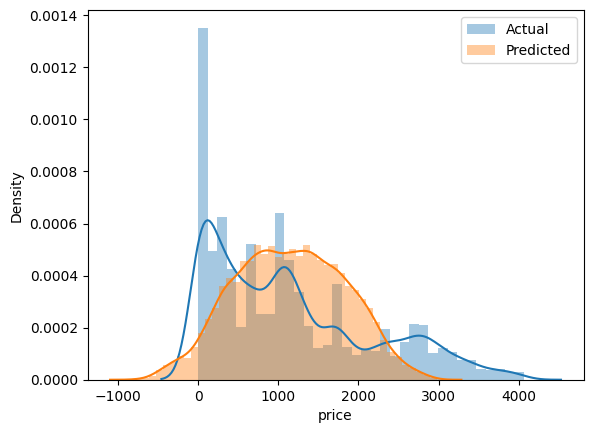

In [ ]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.4630404738330476

In [ ]:


from sklearn import metrics
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)



In [ ]:

mean_abs_error

596.9294505300967

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

2.046156050702722e+16

In [ ]:
mean_sq_eror=metrics.mean_squared_error(y_test,y_pred)

In [ ]:
mean_sq_eror

553138.7080415052

In [ ]:
root_mean_sq_eror= np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [ ]:
root_mean_sq_eror

743.7329547905654

Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
Dt=DecisionTreeRegressor()

In [ ]:
Dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=Dt.predict(x_test)

In [ ]:
y_pred

array([   3.,  884.,  351., ..., 1291., 2957., 1877.])

In [ ]:
r2_score(y_test,y_pred)

0.8167678464904801

In [ ]:
mean_abs_eror=metrics.mean_absolute_error(y_test,y_pred)

In [ ]:
mean_abs_error

596.9294505300967

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

692334189291355.5

In [ ]:
mean_sq_eror=metrics.mean_squared_error(y_test,y_pred)

In [ ]:
mean_sq_eror

188753.14008751902

In [ ]:
root_mean_sq_eror= np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [ ]:
root_mean_sq_eror

434.45729374418266

<ipython-input-84-322d9056a76f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
<ipython-input-84-322d9056a76f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predicted')


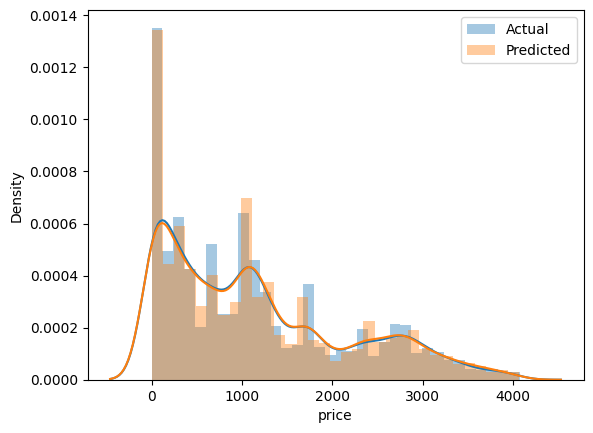

In [ ]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()

Random Forest

In [ ]:
from sklearn.ensemble import  RandomForestRegressor

In [ ]:
Rf=RandomForestRegressor()

In [ ]:
Rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_predt=Rf.predict(x_test)

In [ ]:
r2_score(y_test,y_predt)

0.8871154195605024

In [ ]:
mean_abs_eror=metrics.mean_absolute_error(y_test,y_predt)

In [ ]:
mean_abs_error

596.9294505300967

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

692334189291355.5

<ipython-input-139-322d9056a76f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
<ipython-input-139-322d9056a76f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predicted')


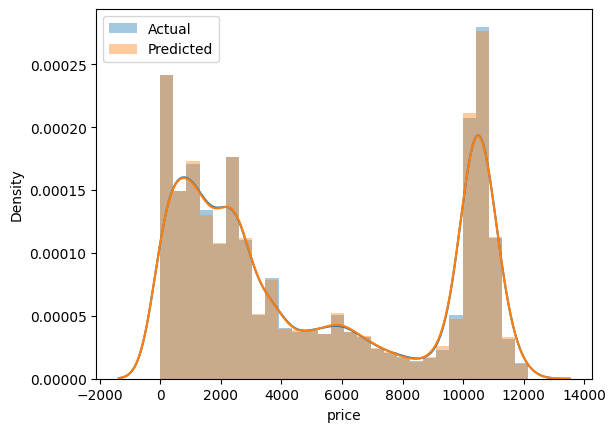

In [ ]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()